In [1]:
from typing import List, Tuple

import japanize_matplotlib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
)
from sklearn.pipeline import make_pipeline
import seaborn as sns
from feature_engineering.pipe.baseline import Baseline

pd.options.display.max_columns = None

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_train_copy = df_train.copy()

## Age欠損を埋める

In [3]:
df_train_copy_age_train = df_train_copy.dropna(subset=["Age"])
df_train_copy_age_missing = df_train_copy[df_train_copy["Age"].isna()]

params = {
    "learning_rate": 0.05,
    "max_depth": 10,
    "n_estimators": 100,
    "num_leaves": 31,
    "verbose": -1,
}

model = lgb.LGBMRegressor(**params)


X = df_train_copy_age_train[
    [
        "Pclass",
        "SibSp",
        "Parch",
    ]
]
y = df_train_copy_age_train["Age"]

model.fit(X, y)

LGBMRegressor(learning_rate=0.05, max_depth=10, verbose=-1)

In [4]:
X_missing = df_train_copy_age_missing[["Pclass", "SibSp", "Parch"]]
predicted_age = model.predict(X_missing)

df_train_copy.loc[df_train_copy["Age"].isna(), "Age"] = predicted_age

In [5]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
# labels = ["10代未満", "10代", "20代", "30代", "40代", "50代", "60代以上"]

df_train_copy["Age_Binned"] = pd.cut(df_train_copy["Age"], bins=bins, labels=labels)
age_count = df_train_copy["Age_Binned"].value_counts().sort_index()

/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_63114/1885024235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_count.index, y=age_count.values, palette="viridis")


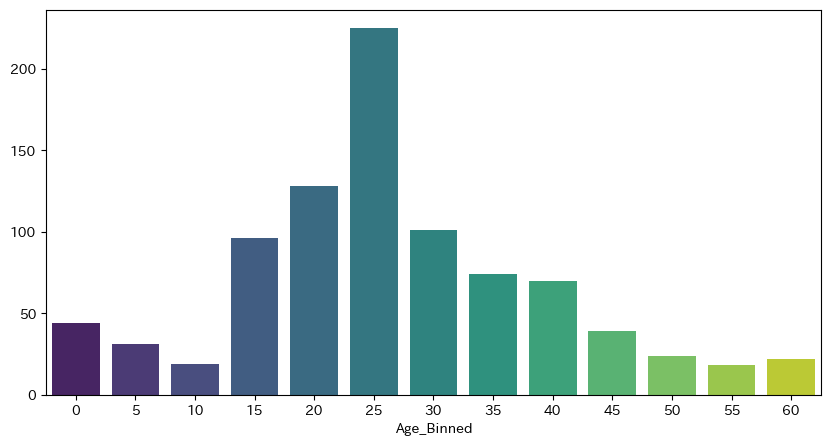

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x=age_count.index, y=age_count.values, palette="viridis")
plt.show()

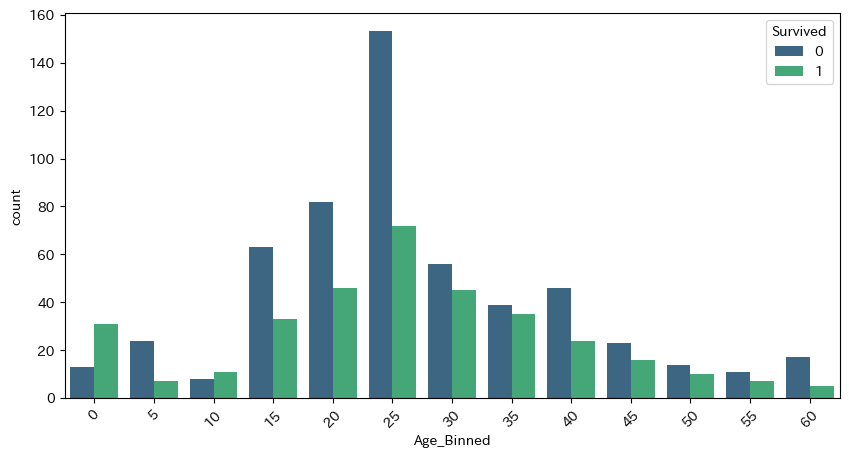

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Age_Binned", hue="Survived", data=df_train_copy, palette="viridis")
plt.xticks(rotation=45)
plt.show()

In [8]:
bl = Baseline(train_file_path="../data/train.csv")

# bl.add_feature(df_train_copy["Age_Binned"])

impls, score = bl.run()

print(score)
print(impls)

bl.make_submit(test_file_path="../data/test.csv", submit_file_path="../data/submit.csv")

/Users/yuramaru/src/kaggle-practice/titanic/src/feature_engineering/pipe/baseline.py:162: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(


0.831680371602536
         feature  importance
0           Fare        1196
1         Pclass         163
2   Title_Master          17
3     Title_Miss          82
4       Title_Mr          78
5      Title_Mrs          70
6  Title_Officer           0
7  Title_Royalty           0
8            Age        1096


/Users/yuramaru/src/kaggle-practice/titanic/src/feature_engineering/pipe/baseline.py:162: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(
